<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/Capstone_01_News_Classification_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **학습목표**
- **CountVectorizer, TfidfVectorizer의 적용 방법**
- **훈련, 검증, 시험 데이터의 이해**
- **모델의 저장과 호출**
- **학습 대상, 변형 데이터와 적용 방법의 이해**
- ^^훈련데이터에 없는 feature(단어)가 시험데이터에 있다면**
     - 훈련 데이터에 없는 feature가 테스트 데이터에 등장하면 기본적으로 TfidfVectorizer는 이를 무시하고 훈련된 특성 집합 내에서만 벡터를 생성
     -  일반적인 텍스트 분류 작업에서는 큰 문제가 발생하지 않으나, 필요에 따라 사전 확장이나 더 복잡한 임베딩 방법을 고려

In [ ]:
# 필요한 라이브러리 임포트
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# 1. 뉴스그룹 데이터 로드
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']  # 일부 카테고리만 선택
newsgroups = fetch_20newsgroups(subset='train', categories=categories)

# 2. 훈련 데이터 준비
X = newsgroups.data  # 텍스트 데이터
y = newsgroups.target  # 레이블

In [ ]:
# prompt: CountVectorizer로 예측하기

# 3. 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. CountVectorizer를 사용하여 텍스트 데이터를 벡터화
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 5. 로지스틱 회귀 모델 훈련
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# 6. 모델 예측 및 평가
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))


Accuracy: 0.9535398230088495
                        precision    recall  f1-score   support

           alt.atheism       0.96      0.95      0.96        86
         comp.graphics       0.93      0.98      0.95       107
               sci.med       0.98      0.95      0.97       132
soc.religion.christian       0.94      0.94      0.94       127

              accuracy                           0.95       452
             macro avg       0.95      0.95      0.95       452
          weighted avg       0.95      0.95      0.95       452



In [ ]:
# 3. TF-IDF 변환
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)  # 불용어 제거, 최대 빈도 제한
X_tfidf = tfidf_vectorizer.fit_transform(X)

# 4. 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 5. Logistic Regression 모델 생성 및 훈련
lgr = LogisticRegression(max_iter=1000)
lgr.fit(X_train, y_train)

# 6. 테스트 데이터 예측
y_pred = lgr.predict(X_test)

# 7. 분류 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=newsgroups.target_names))


Accuracy: 0.9557522123893806

Classification Report:
                         precision    recall  f1-score   support

           alt.atheism       0.98      0.92      0.95        86
         comp.graphics       0.91      1.00      0.95       107
               sci.med       0.98      0.95      0.97       132
soc.religion.christian       0.96      0.94      0.95       127

              accuracy                           0.96       452
             macro avg       0.96      0.95      0.95       452
          weighted avg       0.96      0.96      0.96       452



In [ ]:
lgr

LogisticRegression(max_iter=1000)

In [ ]:
tfidf_vectorizer

TfidfVectorizer(max_df=0.7, stop_words='english')

In [ ]:
# prompt: lgr 을 저장하기

import pickle

# 모델 저장
with open('lgr_model.pkl', 'wb') as f:
    pickle.dump(lgr, f)


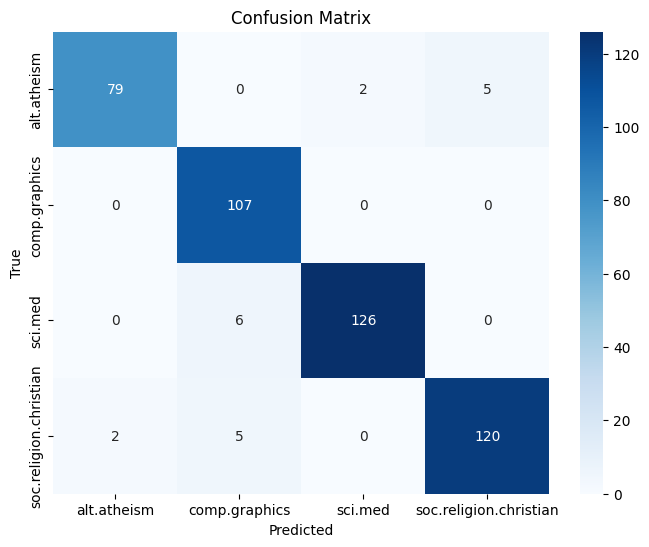

In [ ]:
# prompt: confusion matrix를 그려줘

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix 계산
cm = confusion_matrix(y_test, y_pred)

# 히트맵으로 Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.9535398230088495

Classification Report:
                         precision    recall  f1-score   support

           alt.atheism       0.99      0.86      0.92        86
         comp.graphics       0.96      1.00      0.98       107
               sci.med       1.00      0.95      0.98       132
soc.religion.christian       0.89      0.98      0.93       127

              accuracy                           0.95       452
             macro avg       0.96      0.95      0.95       452
          weighted avg       0.96      0.95      0.95       452



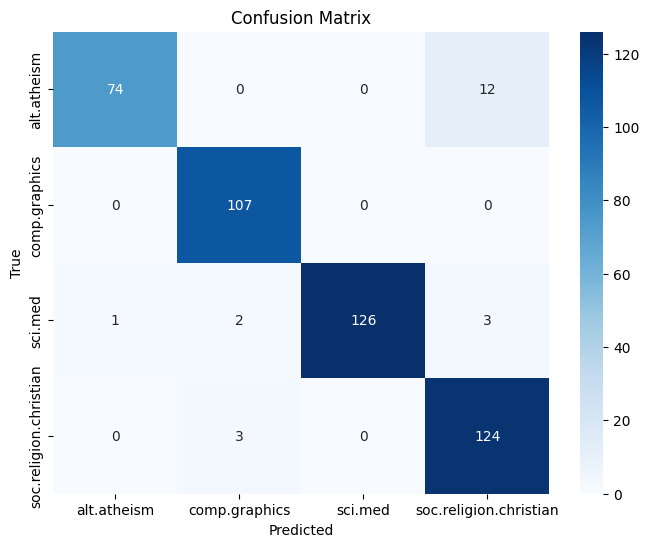

In [ ]:
# prompt: nave bayes를 분류해줘

from sklearn.naive_bayes import MultinomialNB


# 5. Naive Bayes 모델 생성 및 훈련
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# 6. 테스트 데이터 예측
y_pred = classifier.predict(X_test)

# 7. 분류 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=newsgroups.target_names))

# Confusion Matrix 계산
cm = confusion_matrix(y_test, y_pred)

# 히트맵으로 Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# prompt: categories의 모든 종류를 알려면

from sklearn.datasets import fetch_20newsgroups

# 모든 카테고리 가져오기
all_categories = fetch_20newsgroups(subset='train').target_names

# 출력
print("모든 뉴스그룹 카테고리:")
for category in all_categories:
    print(category)


모든 뉴스그룹 카테고리:
alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


## **실전 테스트(Homework)**
### test 데이터로 예측하고 tf-idf 변환을 이용하여 classifiation report와 confusion matrix를 구하고 정확도(Accuracy)를 구하라

In [ ]:
# 1. 뉴스그룹 데이터 로드
print(categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
